### requesting BTC price form CoinGeko


In [2]:
import requests
import pandas as pd
from datetime import datetime
import urllib3


def fetch_btc_prices():
    # API endpoint and parameters
    url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart"
    params = {
        "vs_currency": "usd",  # Fetch prices in USD
        "days": "60"           # Last 60 days
    }
    
    
    # Make the API request
    urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)
    response = requests.get(url, params=params,  verify=False)


    response.raise_for_status()  # Raise an error if the request fails
    
    # Parse JSON response
    data = response.json()
    prices = data['prices']  # List of [timestamp, price] pairs
    
    # Convert to a Pandas DataFrame
    df = pd.DataFrame(prices, columns=["timestamp", "price"])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    
    return df

# Fetch the data
btc_data = fetch_btc_prices()

# Display the first few rows
print(btc_data.head())


                timestamp         price
0 2024-10-27 16:07:35.675  67753.017799
1 2024-10-27 17:04:53.862  67747.592344
2 2024-10-27 18:37:35.491  67595.300565
3 2024-10-27 19:00:31.093  67484.211983
4 2024-10-27 20:13:06.490  67723.127218


## Plot BTC prices with Plotly


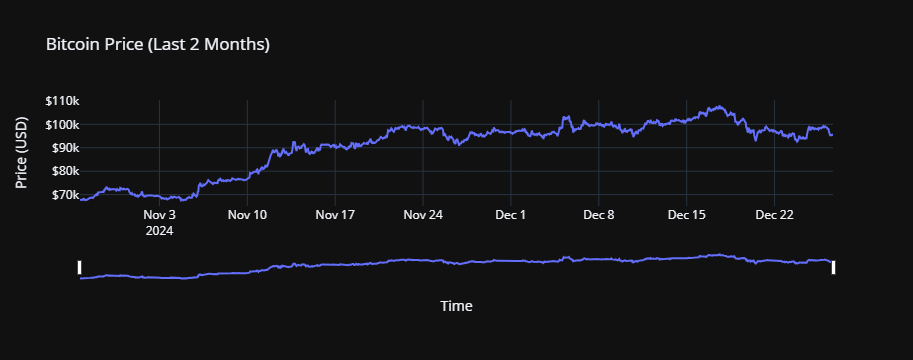

In [4]:
# Plot BTC prices with Plotly
import plotly.graph_objects as go
def plot_btc_prices(data):
    fig = go.Figure()

    # Add line trace for BTC prices
    fig.add_trace(go.Scatter(
        x=data['timestamp'],
        y=data['price'],
        mode='lines',
        name='BTC Price'
    ))

    # Customize the layout
    fig.update_layout(
        title='Bitcoin Price (Last 2 Months)',
        xaxis_title='Time',
        yaxis_title='Price (USD)',
        xaxis=dict(rangeslider=dict(visible=True)),  # Enable zoom with range slider
        yaxis=dict(tickprefix='$'),                 # Add dollar sign to prices
        template='plotly_dark'                      # Optional: dark theme
    )

    # Show the plot
    fig.show()

# Plot the data
plot_btc_prices(btc_data)
